In [122]:
from skimage.external.tifffile import TiffFile
import numpy as np
import os
import pandas as pd
import re
import napari
import matplotlib.pyplot as plt
from skimage.filters import gaussian

In [89]:
#use memmap to load from disk
with TiffFile('../test.tif') as tif:  
    data = tif.asarray(memmap = True)

In [92]:
#look at the data
viewer = napari.view_image(data, rgb=False)

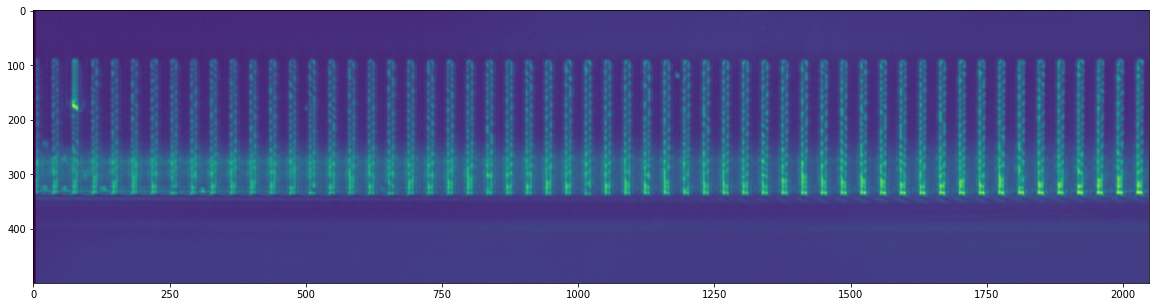

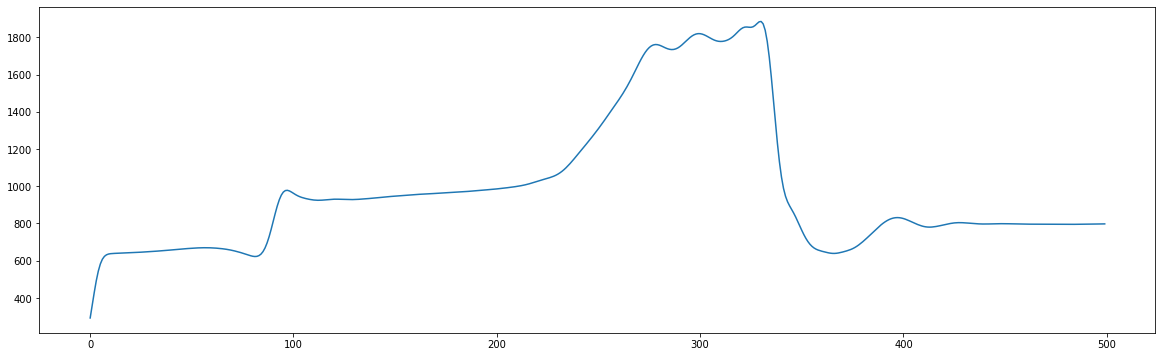

In [283]:
main = data[:,:,:,0:500,:]
plt.figure(figsize=(20,6))
plt.imshow(main[0,0,0,:,:])
plt.show()
time_mean = gaussian(np.mean(main[0,0,:,:,:],axis=0),sigma=3,preserve_range=True)
x_mean = np.mean(time_mean,axis=1)
plt.figure(figsize=(20,6))
plt.plot(np.diff(x_mean,n=0))
plt.show()

In [351]:
valid_ys = np.where((x_mean < 1100) & (x_mean > 990))
min_valid_ys = np.min(valid_ys)
max_valid_ys = np.max(valid_ys)
valid_ys = np.arange(min_valid_ys,max_valid_ys)
valid_xs = x_mean[valid_ys]
valid_ys_2 = np.where((valid_xs < 1100) & (valid_xs > 990))
valid_ys_2 = valid_ys_2 + min_valid_ys

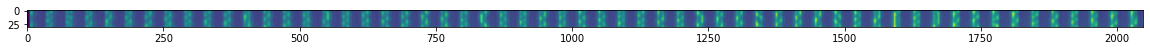

In [352]:
main = data[:,:,:,np.min(valid_ys_2):np.max(valid_ys_2),:]
plt.figure(figsize=(20,6))
plt.imshow(main[0,0,0,:,:])
plt.show()

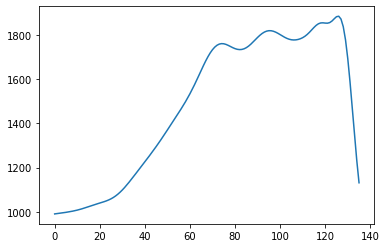

In [353]:
plt.plot(x_mean[valid_ys])

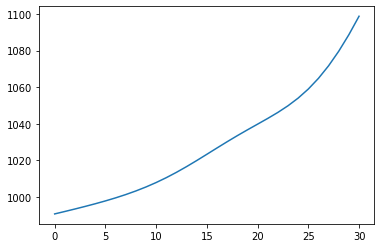

In [354]:
plt.plot(valid_xs[(valid_ys_2- min_valid_ys)[0]])